# **Waze Project**
**Course 5 - Regression analysis: Simplify complex data relationships**

Your team is more than halfway through their user churn project. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

You check your inbox and discover a new email from Ursula Sayo, Waze's Operations Manager. Ursula asks your team about the details of the regression model. You also notice two follow-up emails from your supervisor, May Santner. The first email is a response to Ursula, and says that the team will build a binomial logistic regression model. In her second email, May asks you to help build the model and prepare an executive summary to share your results.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 5 End-of-course project: Regression modeling**

In this activity, you will build a binomial logistic regression model. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a binomial logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="../Images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and data loading**
Import the data and packages that you've learned are needed for building logistic regression models.

In [1]:
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Packages for visualization
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for Logistic Regression & Confusion Matrix
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
#pip install -U pandas

Import the dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load the dataset by running this cell

df = pd.read_csv('waze_dataset.csv')

<img src="../Images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question:

* What are some purposes of EDA before constructing a binomial logistic regression model?

* Logistic models a very sensitive to outliers and can negatively impact the model.
* EDA can help us identify the outliers as well as any missing values or values that may need to be investigated further.
* EDA can help us determine or find any feature that can be engineered that may benefit the model and data.

### **Task 2a. Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



Start with `.shape` and `info()`.

In [4]:
### YOUR CODE HERE ###
print(df.shape)
print(df.info())

(14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
None


**Question:** Are there any missing values in your data?

* In the 'label' column there are 700 missing values.

Use `.head()`.



In [5]:
### YOUR CODE HERE ###
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use `.drop()` to remove the ID column since we don't need this information for your analysis.

In [6]:
### YOUR CODE HERE ###
df = df.drop('ID', axis=1)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Now, check the class balance of the dependent (target) variable, `label`.

In [7]:
### YOUR CODE HERE ###
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

Call `.describe()` on the data.


In [8]:
### YOUR CODE HERE ###
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

* Yes by looking the quartile values and the max values we can see there are multiple standard deviations in the 75th quartile in 'sessions', 'total_navigations_fav1', 'drives', 'total_sessions', 'driven_km_drives' and 'duration_minutes_drives'.

### **Task 2b. Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`km_per_driving_day`**

You know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [9]:
# 1. Create `km_per_driving_day` column
### YOUR CODE HERE ###
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

# 2. Call `describe()` on the new column
### YOUR CODE HERE ###
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,inf
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.672804e+02
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.231459e+02
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,7.579257e+02
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,inf


Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [10]:
# 1. Convert infinite values to zero
### YOUR CODE HERE ###
df['km_per_driving_day'].replace([np.inf, -np.inf], 0, inplace=True)

# 2. Confirm that it worked
### YOUR CODE HERE ###
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110


#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 100 or more drives <u>**and**</u> drove on 20+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [11]:
# Create `professional_driver` column
### YOUR CODE HERE ###
df['professional_driver'] = np.where((df['drives'] >= 100) & (df['driving_days'] >=20), 1, 0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [12]:
# 1. Check count of professionals and non-professionals
### YOUR CODE HERE ###
print(df['professional_driver'].value_counts())
# 2. Check in-class churn rate
### YOUR CODE HERE ###
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

0    14241
1      758
Name: professional_driver, dtype: int64


professional_driver  label   
0                    retained    0.816092
                     churned     0.183908
1                    retained    0.944979
                     churned     0.055021
Name: label, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

<img src="../Images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

In this stage, consider the following question:

* Why did you select the X variables you did?

The variabels that were selected were based on the eda conducted and the business objective.

### **Task 3a. Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [13]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [14]:
# Drop rows with missing data in `label` column
### YOUR CODE HERE ###
df['label'].dropna(axis=0, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

#### **Impute outliers**

You rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

Previously, you determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.


In [16]:
# Impute outliers
### YOUR CODE HERE ###
for col in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
           'duration_minutes_drives']:
    threshold = df[col].quantile(0.95)
    df.loc[df[col] > threshold, col] = threshold

Call `describe()`.

In [17]:
### YOUR CODE HERE ###
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,76.568705,64.058204,184.031320,1749.837789,114.415228,27.214281,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.050537
std,67.297958,55.306924,118.600463,1008.513876,124.686795,36.735583,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.219057
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.000000
max,243.000000,201.000000,454.363204,3500.000000,424.000000,124.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.000000


#### **Encode categorical variables**

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` as to not overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [18]:
# Create binary `label2` column
### YOUR CODE HERE ###
df['label2'] = np.where(df['label'] == 'churned', 1, 0)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2
0,retained,243.0,201.0,296.748273,2276,208.0,0.0,2628.845068,1985.775061,28,19,Android,138.360267,0,0
1,retained,133.0,107.0,326.896596,1225,19.0,64.0,8889.794236,3160.472914,13,11,iPhone,1246.901868,0,0
2,retained,114.0,95.0,135.522926,2651,0.0,0.0,3059.148818,1610.735904,14,8,Android,382.393602,0,0
3,retained,49.0,40.0,67.589221,15,322.0,7.0,913.591123,587.196542,7,3,iPhone,304.530374,0,0
4,retained,84.0,68.0,168.247020,1562,166.0,5.0,3950.202008,1219.555924,27,18,Android,219.455667,0,0


### **Task 3b. Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [19]:
# Generate a correlation matrix
### YOUR CODE HERE ###
df.corr()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996907,0.595796,0.006480,0.003123,0.009746,0.001425,-0.005364,0.024374,0.018518,-0.011099,0.361611,0.033695
drives,0.996907,1.000000,0.593945,0.006198,0.002307,0.010365,0.001789,-0.004763,0.023821,0.018036,-0.010609,0.360867,0.034528
total_sessions,0.595796,0.593945,1.000000,0.005328,0.002377,0.008061,-0.000835,-0.001456,0.015932,0.012568,-0.014563,0.220095,0.022467
n_days_after_onboarding,0.006480,0.006198,0.005328,1.000000,0.001232,-0.007468,-0.002852,-0.009140,-0.009725,-0.008563,0.011631,0.004461,-0.124711
total_navigations_fav1,0.003123,0.002307,0.002377,0.001232,1.000000,0.002467,-0.007898,0.002722,0.012176,0.011339,-0.002056,-0.005216,0.051766
total_navigations_fav2,0.009746,0.010365,0.008061,-0.007468,0.002467,1.000000,0.003831,-0.000951,-0.003489,0.003197,0.004308,0.000369,0.014263
driven_km_drives,0.001425,0.001789,-0.000835,-0.002852,-0.007898,0.003831,1.000000,0.690996,-0.005620,-0.007816,0.343509,-0.003864,0.020131
duration_minutes_drives,-0.005364,-0.004763,-0.001456,-0.009140,0.002722,-0.000951,0.690996,1.000000,-0.005852,-0.007585,0.238133,-0.008780,0.040527
activity_days,0.024374,0.023821,0.015932,-0.009725,0.012176,-0.003489,-0.005620,-0.005852,1.000000,0.947706,-0.397062,0.290220,-0.295190
driving_days,0.018518,0.018036,0.012568,-0.008563,0.011339,0.003197,-0.007816,-0.007585,0.947706,1.000000,-0.407633,0.319999,-0.286080


Now, plot a correlation heatmap.

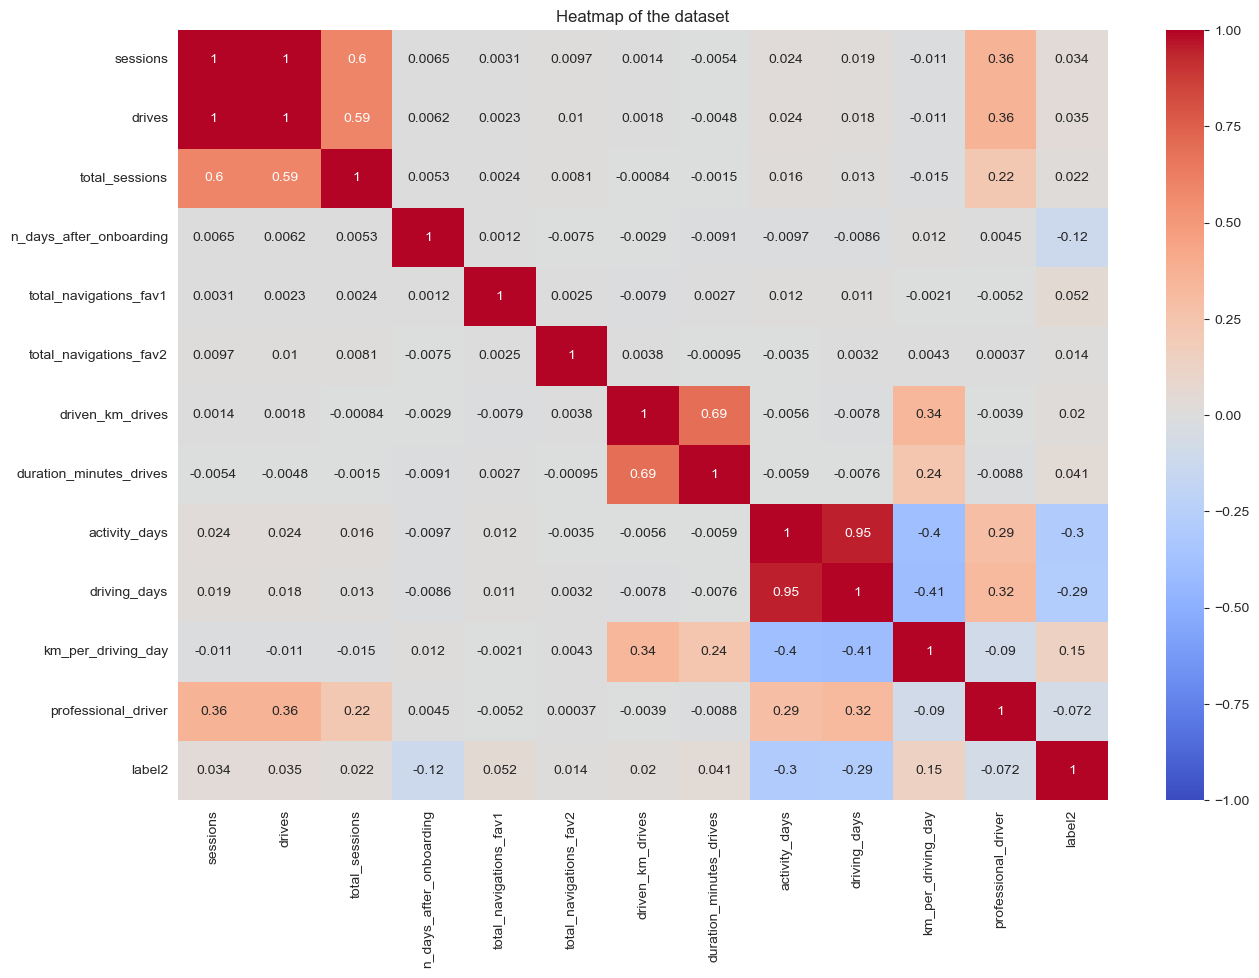

In [20]:
# Plot correlation heatmap
### YOUR CODE HERE ###
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title("Heatmap of the dataset")
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

'sessions' and 'drives' are multicollinear with each other.

### **Task 3c. Create dummies (if necessary)**

If you have selected `device` as an X variable, you will need to create dummy variables since this variable is categorical.

In cases with many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for your model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [21]:
# Create new `device2` variable
### YOUR CODE HERE ###
df['device2'] = np.where(df['device'] == 'iPhone', 1, 0)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2,device2
0,retained,243.0,201.0,296.748273,2276,208.0,0.0,2628.845068,1985.775061,28,19,Android,138.360267,0,0,0
1,retained,133.0,107.0,326.896596,1225,19.0,64.0,8889.794236,3160.472914,13,11,iPhone,1246.901868,0,0,1
2,retained,114.0,95.0,135.522926,2651,0.0,0.0,3059.148818,1610.735904,14,8,Android,382.393602,0,0,0
3,retained,49.0,40.0,67.589221,15,322.0,7.0,913.591123,587.196542,7,3,iPhone,304.530374,0,0,1
4,retained,84.0,68.0,168.247020,1562,166.0,5.0,3950.202008,1219.555924,27,18,Android,219.455667,0,0,0


### **Task 3d. Model building**

#### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [22]:
# Isolate predictor variables
### YOUR CODE HERE ###
X = df.drop(columns=['label', 'label2', 'device', 'sessions', 'driving_days'], axis=1)

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [23]:
# Isolate target variable
### YOUR CODE HERE ###
y = df.label2.values

#### **Split the data**

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [24]:
# Perform the train-test split
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [25]:
# Use .head()
### YOUR CODE HERE ###
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
1615,85.0,101.366180,3037,0.0,0.0,1877.029073,766.223970,1,0.000000,0,1
3178,201.0,322.980713,256,139.0,0.0,3623.349059,1309.751779,25,150.972877,1,1
11601,9.0,283.329931,522,26.0,32.0,3239.596270,1038.621773,19,179.977571,0,1
1001,97.0,242.960851,462,33.0,4.0,4304.733168,849.868188,15,307.480941,0,0
10093,162.0,454.363204,3273,0.0,0.0,6616.311255,1077.435137,9,735.145695,0,0


Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since your predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [26]:
### YOUR CODE HERE ###
model = LogisticRegression(penalty='none', max_iter=400)

In [27]:
model.fit(X_train, y_train)

C:\Users\Junior\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [28]:
### YOUR CODE HERE ###
model.coef_

array([[ 2.09425590e-03,  1.03961662e-04, -4.11557898e-04,
         1.14047513e-03,  6.45701284e-04, -5.36205550e-05,
         1.27124403e-04, -9.89333200e-02,  6.32624539e-05,
        -4.47629040e-04, -1.08527902e-03]])

Call the model's `intercept_` attribute to get the intercept of the model.

In [29]:
### YOUR CODE HERE ###
model.intercept_

array([-0.00175348])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [30]:
# Get the predicted probabilities of the training data
### YOUR CODE HERE ###
training_probabilities = model.predict_proba(X_train)

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [31]:
### YOUR CODE HERE ###
logit_data = X_train.copy()
logit_data['logit'] = [np.log(prob[1]/prob[0]) for prob in training_probabilities] 

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [32]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
### YOUR CODE HERE ###

# 2. Create a new `logit` column in the `logit_data` df
### YOUR CODE HERE ###

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

Text(0.5, 1.0, 'Log-odds: activity_days')

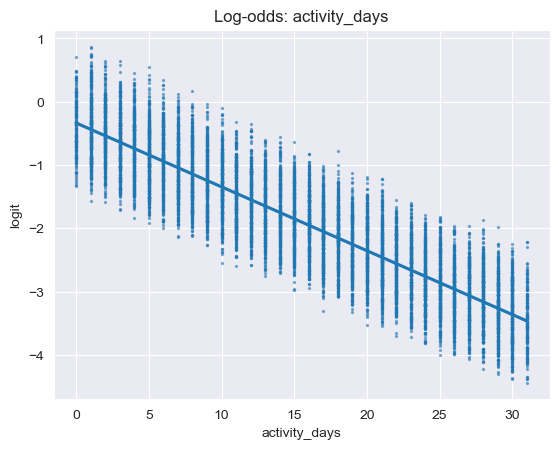

In [33]:
# Plot regplot of `activity_days` log-odds
### YOUR CODE HERE ###

sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days')

<img src="../Images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [34]:
# Generate predictions on X_test
### YOUR CODE HERE ###
y_pred = model.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [35]:
# Score the model (accuracy) on the test data
### YOUR CODE HERE ###
model.score(X_test, y_test)

0.8309333333333333

### **Task 4b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [36]:
### YOUR CODE HERE ###
cm = confusion_matrix(y_test, y_pred)

Next, use the `ConfusionMatrixDisplay()` function to display the confusion matrix from the above cell, passing the confusion matrix you just created as its argument.

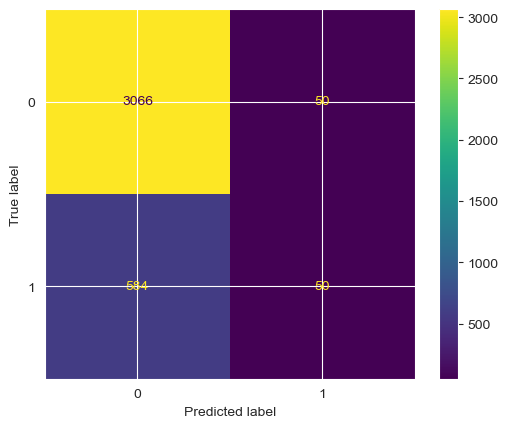

In [37]:
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [38]:
# Calculate precision manually
### YOUR CODE HERE ###
precision = cm[1,1] / (cm[0,1] + cm[1,1])
precision

0.5

In [39]:
# Calculate recall manually
### YOUR CODE HERE ###
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.07886435331230283

In [40]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.84      0.98      0.91      3116
     churned       0.50      0.08      0.14       634

    accuracy                           0.83      3750
   macro avg       0.67      0.53      0.52      3750
weighted avg       0.78      0.83      0.78      3750



**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### **BONUS**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [41]:
# Create a list of (column_name, coefficient) tuples
### YOUR CODE HERE ###
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
### YOUR CODE HERE ###
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

Text(0.5, 1.0, 'Feature importance')

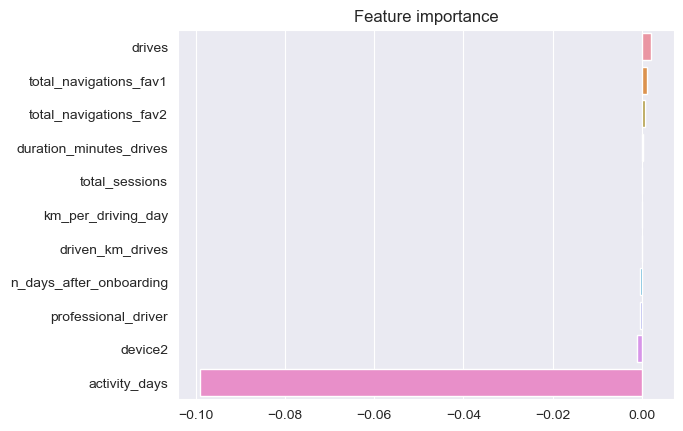

In [42]:
# Plot the feature importances
### YOUR CODE HERE ###
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance')

### **Task 4c. Conclusion**

Now that you've built your regression model, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?

2. Were there any variables that you expected to be stronger predictors than they were?

3. Why might a variable you thought to be important not be important in the model?

4. Would you recommend that Waze use this model? Why or why not?

5. What could you do to improve this model?

6. What additional features would you like to have to help improve the model?


1. 'activity_days' was the most important feature probably due to th negative correlation with user churn.
2. Yes, when exploring the data user churn rate increased as 'km_per_driving_day' increased so I thought this would have been a better indicator. The correlation heat map also showed that it had the strongest positive correlation with user churn and it was actually teh second least import variable.
3. I guess this may be due to the limitations of multiple logistic regression. Features can interact with each other and this interaction can make the model more complex and difficult to explain.
4. I would not recommend Waze to use this model unless it is used internally as a guide to explore other efforts.
5. To imporve this model, new features could have been engineered to try and find a better predictive variable. It may also been helpful to scale the data and see how the model performed then.
6. It would have been helpful to have more information about the drivers such as locations, times.